### Import Necessary Library

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Read the data

In [102]:
from sklearn.datasets import fetch_california_housing
california_data =fetch_california_housing()
california_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [103]:
california_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [104]:
california_data.target_names

['MedHouseVal']

In [105]:
california_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [106]:
print(california_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [107]:
california_data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Create the dataframe 

In [108]:
df =pd.DataFrame(california_data.data ,columns=california_data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [109]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [110]:
df["MedHouseVal"] =california_data.target

In [111]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Check Nan Values

In [112]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

###  Check Duplicate Values

In [113]:
df.duplicated().sum()

0

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [115]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [116]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


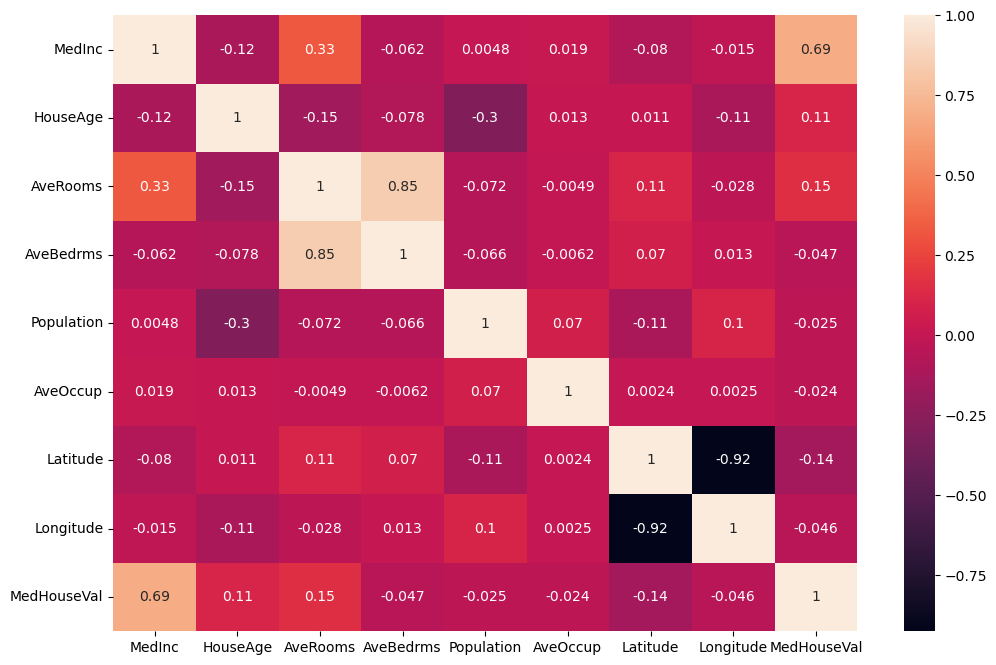

In [117]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Devide Data For Training in to Independant Var & Dependant Var

In [118]:
X =df[["HouseAge"]]
y =df["MedHouseVal"]

In [119]:
X

,HouseAge
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0
...,...
20635,25.0
20636,18.0
20637,17.0
20638,18.0


In [120]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Train Test Split Data

In [121]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test =train_test_split(X ,y ,test_size=0.35,random_state=42)
print(f"X train {X_train.shape}\nX test {X_test.shape}\ny train {y_train.shape}\ny test {y_test.shape}")

X train (13416, 1)
X test (7224, 1)
y train (13416,)
y test (7224,)


In [122]:
X_train

,HouseAge
4560,6.0
18418,14.0
15813,52.0
12573,37.0
16471,25.0
...,...
11284,35.0
11964,33.0
5390,36.0
860,15.0


In [123]:
X_test

,HouseAge
20046,25.0
3024,30.0
15663,52.0
20484,17.0
9814,34.0
...,...
5386,24.0
8948,45.0
14544,18.0
16666,9.0


### Scaling data X train & X test

In [124]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler

StandardScaler()

In [125]:
X_train =scaler.fit_transform(X_train)
X_test  =scaler.transform(X_test)

In [126]:
X_train

array([[-1.78877938],
       [-1.15341722],
       [ 1.86455305],
       ...,
       [ 0.59382872],
       [-1.07399695],
       [ 1.86455305]])

In [127]:
X_test

array([[-0.27979425],
       [ 0.1173071 ],
       [ 1.86455305],
       ...,
       [-0.83573614],
       [-1.55051857],
       [-1.86819965]])

### Train The model 

In [128]:
from sklearn.linear_model import LinearRegression
Linear_reg =LinearRegression()
Linear_reg

LinearRegression()

In [129]:
Linear_reg.fit(X_train ,y_train)

LinearRegression()

In [131]:
# Slope Or coefficient

Linear_reg.coef_

array([0.12103712])

In [132]:
# Intercept 
Linear_reg.intercept_

2.067907514907573

### Prediction

In [134]:
y_pred =Linear_reg.predict(X_test)
y_pred

array([2.03404202, 2.08210603, 2.29358765, ..., 1.96675242, 1.88023721,
       1.841786  ])

### Performance Metrics or evaluation Metrics

In [137]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
mean_square_error =mean_squared_error(y_test ,y_pred)
mean_absolute_error =mean_absolute_error(y_test,y_pred)
root_meanSquare_error =np.sqrt(mean_square_error)
print("mean Square error",mean_square_error)
print("mean_absolute_error",mean_absolute_error)
print("root_meanSquare_error",root_meanSquare_error)

mean Square error 1.3207881890812696
mean_absolute_error 0.9088225422874208
root_meanSquare_error 1.1492554933874668


In [138]:
from sklearn.metrics import r2_score

R2_score=r2_score(y_test ,y_pred)
print(R2_score)

0.011400328659343595


In [139]:
## Adjusted R2 score
1 - (1-R2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.011263441416012099

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [140]:
import pickle

pickle.dump(Linear_reg ,open("SimpleRegresor.pkl","wb"))

In [141]:
model =pickle.load(open("SimpleRegresor.pkl","rb"))

In [142]:
model.predict(X_test)

array([2.03404202, 2.08210603, 2.29358765, ..., 1.96675242, 1.88023721,
       1.841786  ])